# Model training

importing required packages

In [ ]:
%pip install scikit-learn
%pip install catboost
%pip install xgboost

In [40]:
# Basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [41]:
df=pd.read_csv('data\StudentsPerformance.csv')

In [42]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [43]:
x=df.drop(columns=['math score'], axis=1)

In [44]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [45]:
print("categories in 'gender' variable:", end=' ')
print(df['gender'].unique())
print("categories in 'race/ethnicity' variable:", end=' ')
print(df['race/ethnicity'].unique())

categories in 'gender' variable: ['female' 'male']
categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']


In [46]:
y=df['math score']

In [47]:
cat_features=x.select_dtypes(include="object").columns
print(cat_features)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


1. What is a ColumnTransformer?

A ColumnTransformer is a tool in scikit-learn that lets you apply different preprocessing steps to different columns of a dataset in a single step.

Some columns need scaling (numeric)
Some columns need encoding (categorical)
Some columns may need imputation (filling missing values)

Instead of doing each separately, ColumnTransformer does it all together and outputs a ready-to-use dataset for machine learning.

2. Why is it used?

Machine learning models require all input features to be numeric.
But real datasets often have mixed data types: numeric + categorical
And different types require different preprocessing
ColumnTransformer solves this problem:

It applies the right transformer to the right columns
Outputs a single array or DataFrame ready for the mode

In [ ]:
#create column type transformer with 3 types of transformers

num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

#pipeline -> preprocessor
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StanderedScaler", numeric_transformer,num_features)
    ]
)


What fit_transform() does

fit_transform() is a combination of two steps:
1. fit() → learns the parameters from your data
+ For StandardScaler: calculates mean and standard deviation for each numeric column
+ For OneHotEncoder: learns all unique categories in each categorical column
2. transform() → actually applies the transformations to your data
+ Numeric columns → scaled
+ Categorical columns → one-hot enc

In [ ]:
x=preprocessor.fit_transform(x)
# You use fit_transform() only on the "training data", because:
# You want to learn the parameters (mean, std, categories) from the training set
# Then apply the transformation to the same data

In [ ]:
x.shape
print(x)
# x becomes a NumPy array, not a DataFrame
# Original column names are lost (unless you manually reconstruct them)
# The array is now ready for ML models, which require all numeric input

In [ ]:
# If you want x to remain a DataFrame with column names, you can do:

# import pandas as pd

# x_transformed = pd.DataFrame(
#     preprocessor.fit_transform(x),
#     columns = preprocessor.get_feature_names_out()
# )

In [69]:
# separate dataset into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((800, 19), (200, 19))

Create an Evaluate Function to give all metrics after model Training

In [75]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
# variable = list(dictionary.values())[index]-->model=list(models.values())[i]
# Breakdown:
# dictionary.values() - returns a view of all values in the dictionary
# list() - converts the view to a list
# [index] - accesses the element at the specified position

In [ ]:
# In Python, the () parentheses are used for both:
# Function calls: function_name()
# Object instantiation: ClassName()
"""class Person:
    def __init__(self, name):
        self.name = name

# Object instantiation  
person = Person("Bob")
__________________________
What happens:
Python finds the class Person
Creates a new instance (allocates memory)
Calls __init__ method to initialize the object
Returns the new object

The name person now holds the object reference



When we write LinearRegression(), Python creates an object of the LinearRegression class
Each object can now:
Be trained (fit)
Make predictions (predict)
Access model-specific attributes (like coefficients)
"""

'class Person:\n    def __init__(self, name):\n        self.name = name\n\n# Object instantiation  \nperson = Person("Bob")\n'

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3244
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

In [78]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.850722
8,AdaBoost Regressor,0.847730
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.764402


In [79]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train, y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.03


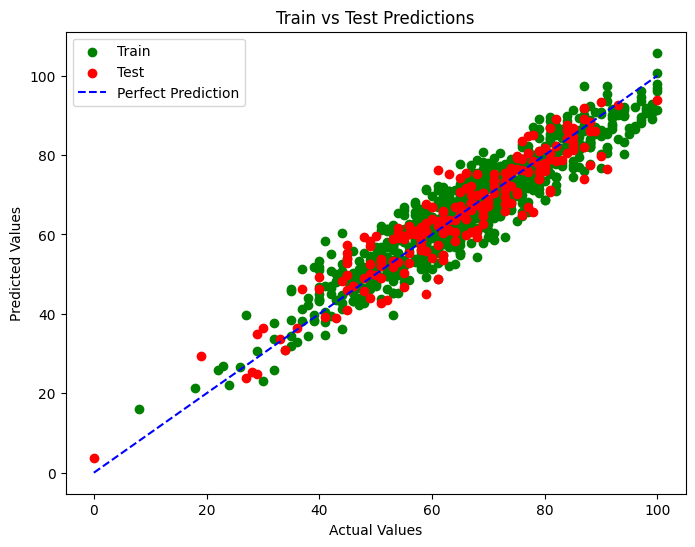

In [84]:
plt.figure(figsize=(8,6))

# Training set
plt.scatter(y_train, lin_model.predict(x_train), color='green', label='Train')

# Test set
plt.scatter(y_test, y_pred, color='red', label='Test')

# Perfect prediction line
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         color='blue', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Train vs Test Predictions')
plt.legend()
plt.show()



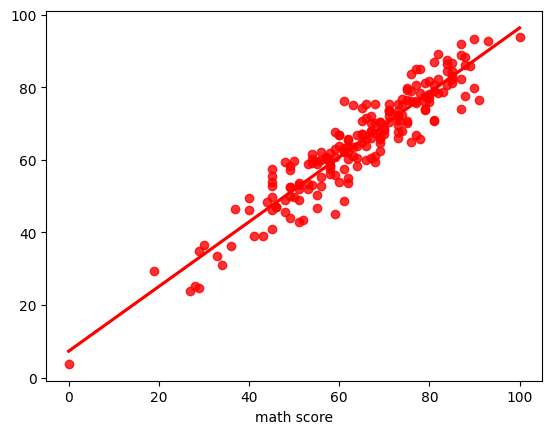

In [85]:

sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

Difference between Actual and Predicted Values

In [87]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
